In [1]:
# library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# current data
# viirs_url = 'https://firms.modaps.eosdis.nasa.gov/data/active_fire/viirs/csv/VNP14IMGTDL_NRT_USA_contiguous_and_Hawaii_24h.csv'
modis_url = 'https://firms.modaps.eosdis.nasa.gov/data/active_fire/c6/csv/MODIS_C6_USA_contiguous_and_Hawaii_24h.csv'

## Summary of Data for FIRMS Active Fire

Nasa provides two analysis ready data products that are appropriate for detecting wildfires, MCD14DL that I will refer to as MODIS and VNP14IMGTDL_NRT or VIIRS. 

MODIS is a data product generated from telometry from two satellites Aqua and Terra. It resolves the earth's surface into roughly 1km x 1km pixels and evaluates whether each pixel is on fire using a contextual algorithm that exploits the strong emission of mid-infrared radiation from fires.

VIIRS has a smaller resolution and better global coverage (due to the Suomi-NPP satellite's orbit) and can resolve fire pixels down to 375m. 

Using both data sources should increase data coverage and potentially add a validation element to our model.

However, historical viirs data is missing the daynight feature so we are focusing on modus initially.

In [2]:
# v = pd.read_csv(viirs_url)
m = pd.read_csv(modis_url)
m.shape

(550, 13)

In [3]:
m.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,confidence,version,bright_t31,frp,daynight
0,20.880,-156.660,314.2,4.2,1.9,2019-09-11,30,A,0,6.0NRT,301.5,70.7,D
1,36.357,-76.806,307.9,1.2,1.1,2019-09-11,325,T,73,6.0NRT,292.3,10.1,N
2,36.696,-81.184,313.5,1.0,1.0,2019-09-11,325,T,87,6.0NRT,290.7,13.1,N
3,40.390,-79.853,303.7,1.0,1.0,2019-09-11,325,T,56,6.0NRT,293.1,5.3,N
4,41.367,-84.923,302.4,1.2,1.1,2019-09-11,325,T,49,6.0NRT,290.9,5.6,N


In [4]:
# version denotes the sensor product i.e. Modis/virrs, we'll map this to the name for easier recognition
# mapping names onto version
version_to_names = {'6.0NRT' : 'modis', '1.0NRT' : 'viirs'}

m['version'] = m['version'].map(version_to_names)

In [11]:
# historical modus data
mh = pd.read_csv('~/datascience/burn notice/Data-Science/Data/DL_FIRE_M6_66499 - Historical Modis/fire_archive_M6_66499.csv')
# vh = pd.read_csv('~/datascience/burn notice/Data-Science/Data/fire_archive_V1_67178.csv')
mh.shape

(1780524, 15)

In [13]:
# match historical features with current ones
mh.drop(columns=['instrument', 'type'], inplace=True)
type
# remap version
hversion_to_names = { 6.2 : 'modis', '1T' : 'viirs'}
mh['version'] = mh['version'].map(hversion_to_names)

Now we check to make sure that our features at the same in the historical and current data

In [14]:
# test to see if our features are the same
cf = set(m.columns.tolist())
hf = set(mh.columns.tolist())
assert cf == hf

No assertion error means we're good.

In [16]:
# we'll save our feature engineered historical data-set, the current dataset is not important, o
# nly the feature processing as we will need to apply that in our deployed model
mh.to_pickle('~/datascience/burn notice/Data-Science/Data/clean_historical_modis.pkl')

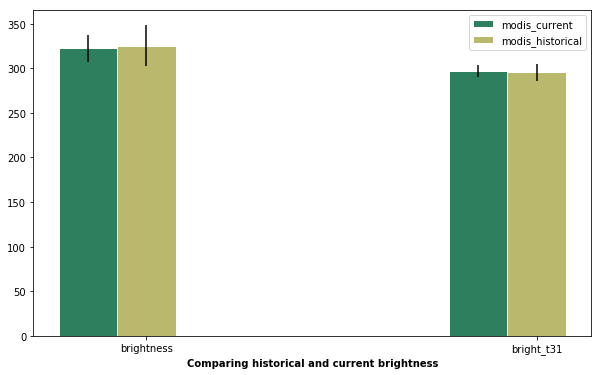

In [16]:
from matplotlib.pyplot import figure
figure(num=1, figsize=(10,6))

# set width of bar
barWidth = 0.15
 
# set height of bar
bars3 = [m.brightness.mean(), m.bright_t31.mean()]
bars4 = [mh.brightness.mean(), mh.bright_t31.mean()]

#set error bars
error3 = [m.brightness.std(), m.bright_t31.std()]
error4 = [mh.brightness.std(), mh.bright_t31.std()]
 
# Set position of bar on X axis
r1 = np.arange(len(bars3))
r2 = [x + barWidth for x in r1]

 
# Make the plot
plt.bar(r1, bars3, yerr=error3, color='#2d7f5e', width=barWidth, edgecolor='white', label='modis_current')
plt.bar(r2, bars4, yerr=error4, color='#bab86c', width=barWidth, edgecolor='white', label='modis_historical')
 
# Add xticks on the middle of the group bars
plt.xlabel('Comparing historical and current brightness', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars3))], ['brightness', 'bright_t31'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

We are comparing the current and historical data to see if values/collection standards are within the same ranges. 

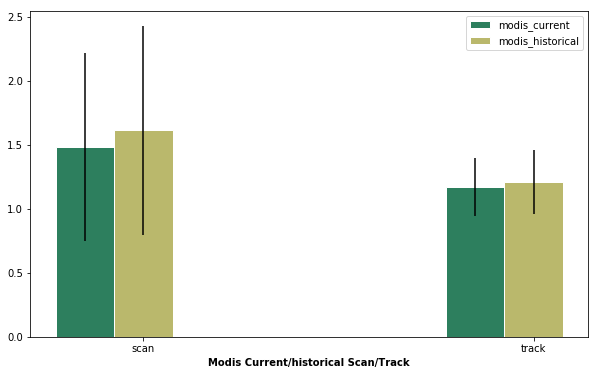

In [19]:
figure(num=1, figsize=(10,6))

# set width of bar
barWidth = 0.15
 
# set height of bar
bars3 = [m.scan.mean(), m.track.mean()]
bars4 = [mh.scan.mean(), mh.track.mean()]

#set error bars
error3 = [m.scan.std(), m.track.std()]
error4 = [mh.scan.std(), mh.track.std()]
 
# Set position of bar on X axis
r1 = np.arange(len(bars3))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars3, yerr=error3, color='#2d7f5e', width=barWidth, edgecolor='white', label='modis_current')
plt.bar(r2, bars4, yerr=error4, color='#bab86c', width=barWidth, edgecolor='white', label='modis_historical')
 
# Add xticks on the middle of the group bars
plt.xlabel('Modis Current/historical Scan/Track', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars3))], ['scan', 'track'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

The values look more similar now so we will conclude that our understanding is sufficient and treat these measurements as from the same scale.

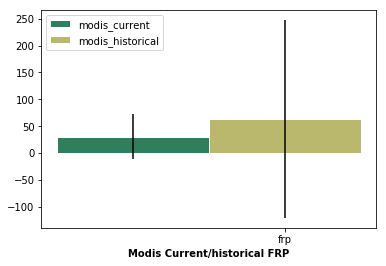

In [21]:
#figure(num=1, figsize=(8,4))

# set width of bar
barWidth = 0.15
 
# set height of bar
bars3 = [m.frp.mean()]
bars4 = [mh.frp.mean()]

#set error bars
error3 = [m.frp.std()]
error4 = [mh.frp.std()]
 
# Set position of bar on X axis
r1 = np.arange(len(bars3))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars3, yerr=error3, color='#2d7f5e', width=barWidth, edgecolor='white', label='modis_current')
plt.bar(r2, bars4, yerr=error4, color='#bab86c', width=barWidth, edgecolor='white', label='modis_historical')
 
# Add xticks on the middle of the group bars
plt.xlabel('Modis Current/historical FRP', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars3))], ['frp'])
 
# Create legend & Show graphic
plt.legend(loc='upper left')
plt.show()